# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне.

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

In [3]:

coin = sps.bernoulli.rvs(p=0.5)

def uniform(size=1, precision=30):
    arr_power = 2.0 ** np.arange(-precision, 0)
    tensor_array = np.append(size, precision)
    res = np.dot(coin(tensor_array), arr_power)
    return res

def normal(size=1, loc=0, scale=1, precision=30):
    return loc + scale * np.sqrt(-2 * np.log(uniform(size, precision))) * np.cos(2 * np.pi * uniform(size, precision))


def expon(size=1, lambd=1, precision=30):
    return -np.log(1 - uniform(size, precision)) / lambd


**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

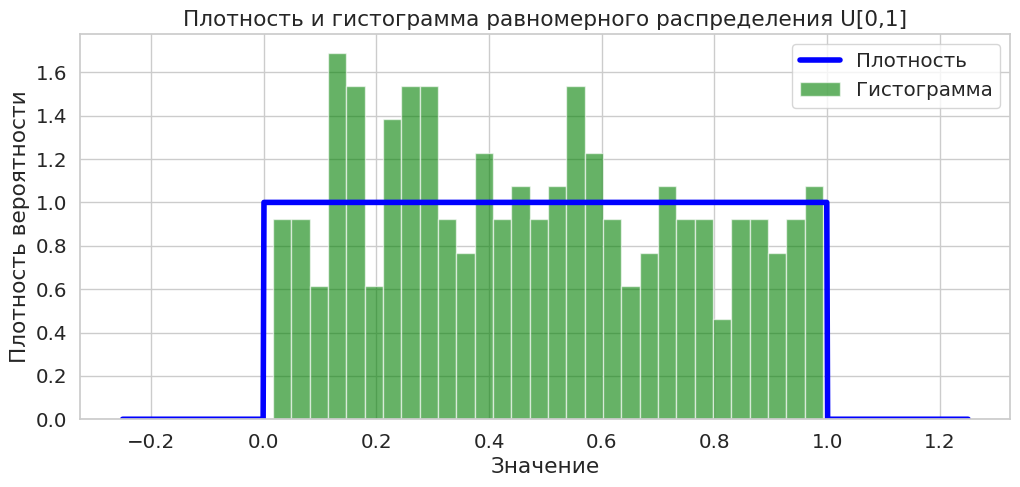

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps


def uniform(size=1, precision=30):
    arr_power = 2.0 ** np.arange(-precision, 0)
    tensor_array = np.append(size, precision)
    res = np.dot(np.random.randint(2, size=(size, precision)), arr_power)
    return res


selection_size = 200
precision = 30
# Генерация 200 независимых случайных величин из U[0,1]
data = uniform(size=selection_size, precision=precision)

x = np.linspace(-0.25, 1.25, 1000)
pdf = sps.uniform.pdf(x, 0, 1)

# Построение графика плотности и гистограммы
plt.figure(figsize=(12, 5))

# График плотности
plt.plot(x, pdf, color='blue', lw=4, label='Плотность')

# Гистограмма
plt.hist(data, bins=30, density=True, alpha=0.6, color='green', label='Гистограмма')

# Настройка графика
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.title('Плотность и гистограмма равномерного распределения U[0,1]')
plt.legend()

plt.show()


Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

In [5]:
def uniform(size=1, precision=30):
    arr_power = 2.0 ** np.arange(-precision, 0)
    tensor_array = np.append(size, precision)
    res = np.dot(np.random.randint(2, size=(size, precision)), arr_power)
    return res

precisions = [1, 3, 5, 10, 20, 35, 50, 60, 70, 100]

# Создание главного графика
plt.figure(figsize=(15, 8))


for i, precision in enumerate(precisions):
    ax = plt.subplot(5, 2, i + 1)

    # Генерация выборки и отрисовка распределения на подграфике
    sample = uniform(size=100, precision=precision)
    plt.scatter(sample, np.zeros(sample.size), alpha=0.4)
    plt.suptitle("Значения случайных величин в зависимости от precision для U[0,1]")

    ax.set_yticks([])
    plt.xlabel("Значение")

# Автоматическое корректное размещение графиков
plt.tight_layout()
plt.show()


Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

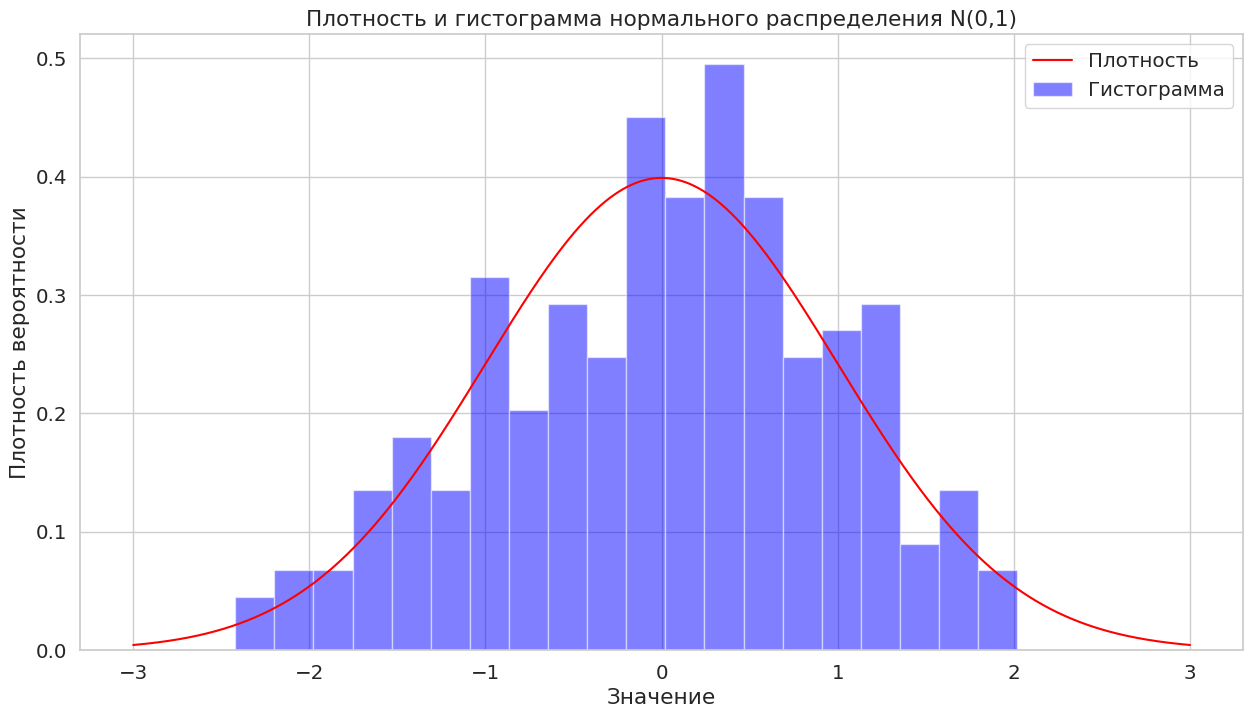

In [6]:
# Генерация выборки из нормального распределения
data = normal(size=200)

# Создание точек сетки для построения графика плотности
x = np.linspace(-3, 3, 1000)
pdf = np.exp(-0.5 * ((x - 0) / 1) ** 2) / (1 * np.sqrt(2 * np.pi))  # Плотность вероятности нормального распределения N(0,1)

# Построение графика плотности и гистограммы
plt.figure(figsize=(15, 8))

# График плотности
plt.plot(x, pdf, color='red', label='Плотность')

# Гистограмма
plt.hist(data, bins=20, density=True, alpha=0.5, color='blue', label='Гистограмма')

# Настройка графика
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.title('Плотность и гистограмма нормального распределения N(0,1)')
plt.legend()
plt.show()

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

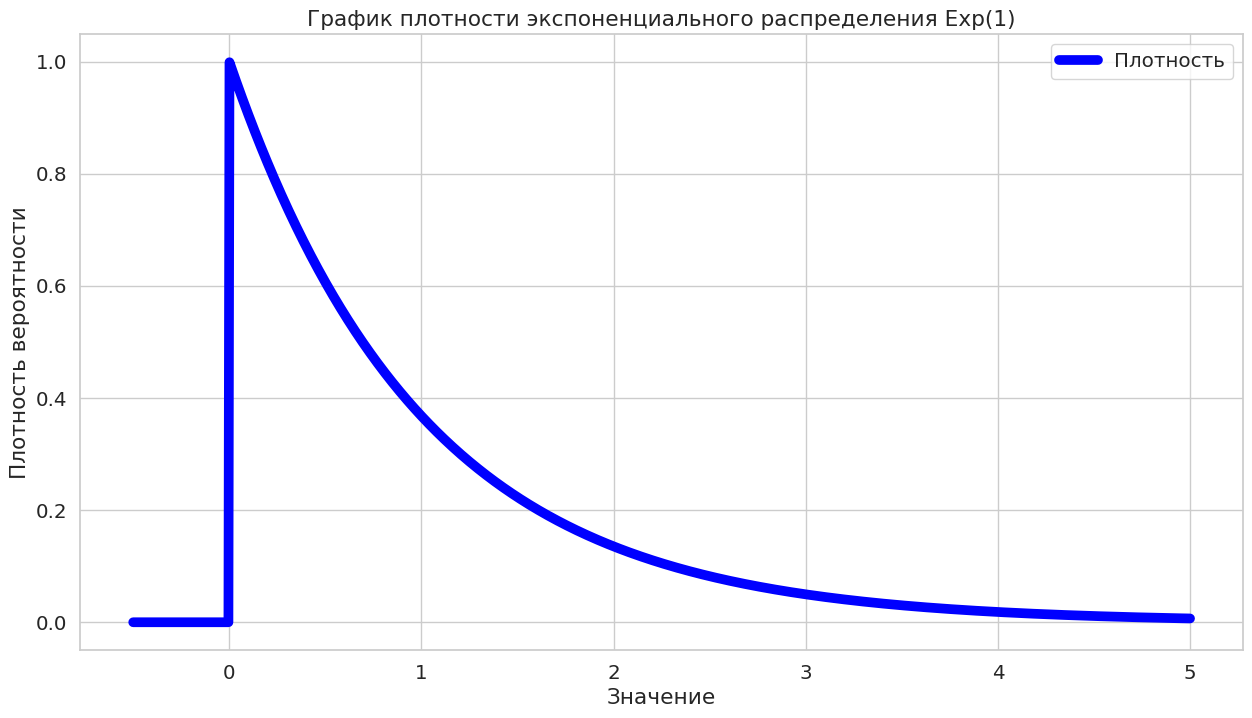

In [7]:
data = expon(size=100)

# Создание точек сетки для построения графика плотности
x = np.linspace(-0.5, 5, 1000)
pdf = np.exp(-x) * (x >= 0)  # Плотность вероятности экспоненциального распределения Exp(1), усеченная до x >= 0

# Построение графика плотности
plt.figure(figsize=(15, 8))
plt.plot(x, pdf, color='blue', lw=7, label='Плотность')

# Настройка графика
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.title('График плотности экспоненциального распределения Exp(1)')
plt.legend()

plt.show()

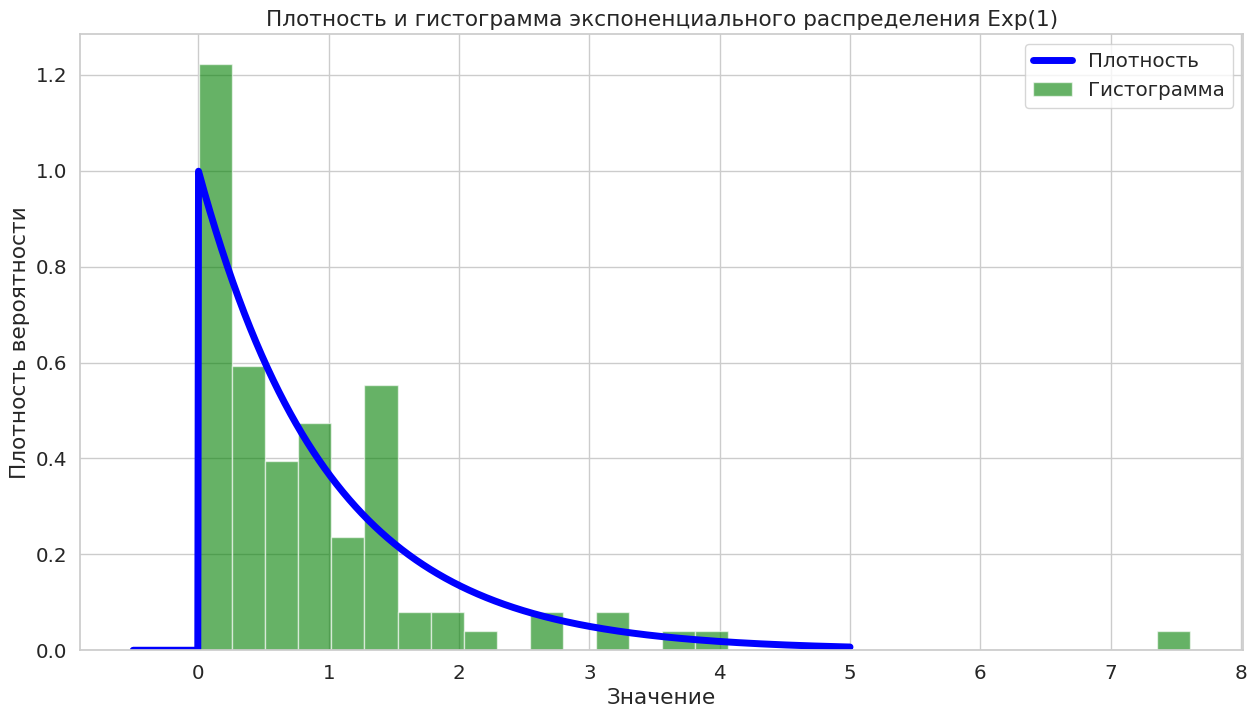

In [8]:
def expon(size=1, lambd=1, precision=30):
    return -np.log(1 - uniform(size, precision)) / lambd

# Генерация выборки из экспоненциального распределения
data = expon(size=100)

# Создание точек сетки для построения графика плотности
x = np.linspace(-0.5, 5, 1000)
pdf = np.exp(-x) * (x >= 0.0)  # Плотность вероятности экспоненциального распределения Exp(1), усеченная до x >= 0

# Построение графика плотности и гистограммы
plt.figure(figsize=(15, 8))

# Плотность
plt.plot(x, pdf, lw=5, color='blue', label='Плотность')

# Гистограмма
plt.hist(data, bins=30, density=True, alpha=0.6, color='green', label='Гистограмма')

# Настройка графика
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.title('Плотность и гистограмма экспоненциального распределения Exp(1)')
plt.legend()

plt.show()

**Выводы:**

 - На графиках мы отразитили, что по равномерноему распределению можно построить нормальное и экпоненциальное.
 - Для равномерного распределения показали что, чем больше параментр precision, тем больше значений принимает случайная величина.
 - Все три построенные диаграммы построенные по случайно сгенерированным велечинам соответствуют равномерному, нормальному и экспотенциальным величинам, соотвественно.

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

In [9]:

# Cтроим оба графика
x = np.linspace(-10, 10, 1000)
normal = sps.norm.pdf(x, loc=0, scale=1)
cauchy = sps.cauchy.pdf(x, loc=0, scale=1)

plt.figure(figsize=(15, 10))
plt.plot(x, normal, label='Нормальное распределение', linewidth=5, color='blue')
plt.plot(x, cauchy, label='Распределение Коши', linewidth=5, color='red')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title(' Плотности нормального распределение и распределения Коши')
plt.legend()
plt.show()

**Ответ на вопрос:**
- Сравнив плотности Коши и нормального распределения, исходя из графика видно, что нормальное распределение имеет симметричную форму, а Коши имеет более тяжёлые хвосты.Тяжеловесные хвосты говорят о том, что вероятность гаших значений убывает медленнее в сравнении с нормальным распределением. При анализе, данные хвосты могут привести к достаточно большому разбросу данных и легковидимым выбросам.
- Так же, стоит отметить что у распределения Коши нет математического ожидания, из-за больших хвостов. То есть из-за них, интеграл плотности вероятности распределения Коши не сходится. Это стоит учитывать при анализе, и знать в каких случаях стоит использовать распределение Коши.

- Во многих источниках пишут что распределение Коши лучше использовать при
  учёте экстремальных значений.


**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон?

In [10]:
size = 1000  # количество случайных величин
samples = sps.cauchy().rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

***Строим график, как в классном ноутбуке**

In [11]:
plt.figure(figsize=(30, 6))
plt.plot(cum_means, lw=5, label='Cреднее Коши' )
plt.hlines(0.5, 0, size, color='red', alpha=0.5, label='Ожидаемое значение')
plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.legend()
plt.xlim((0, size));

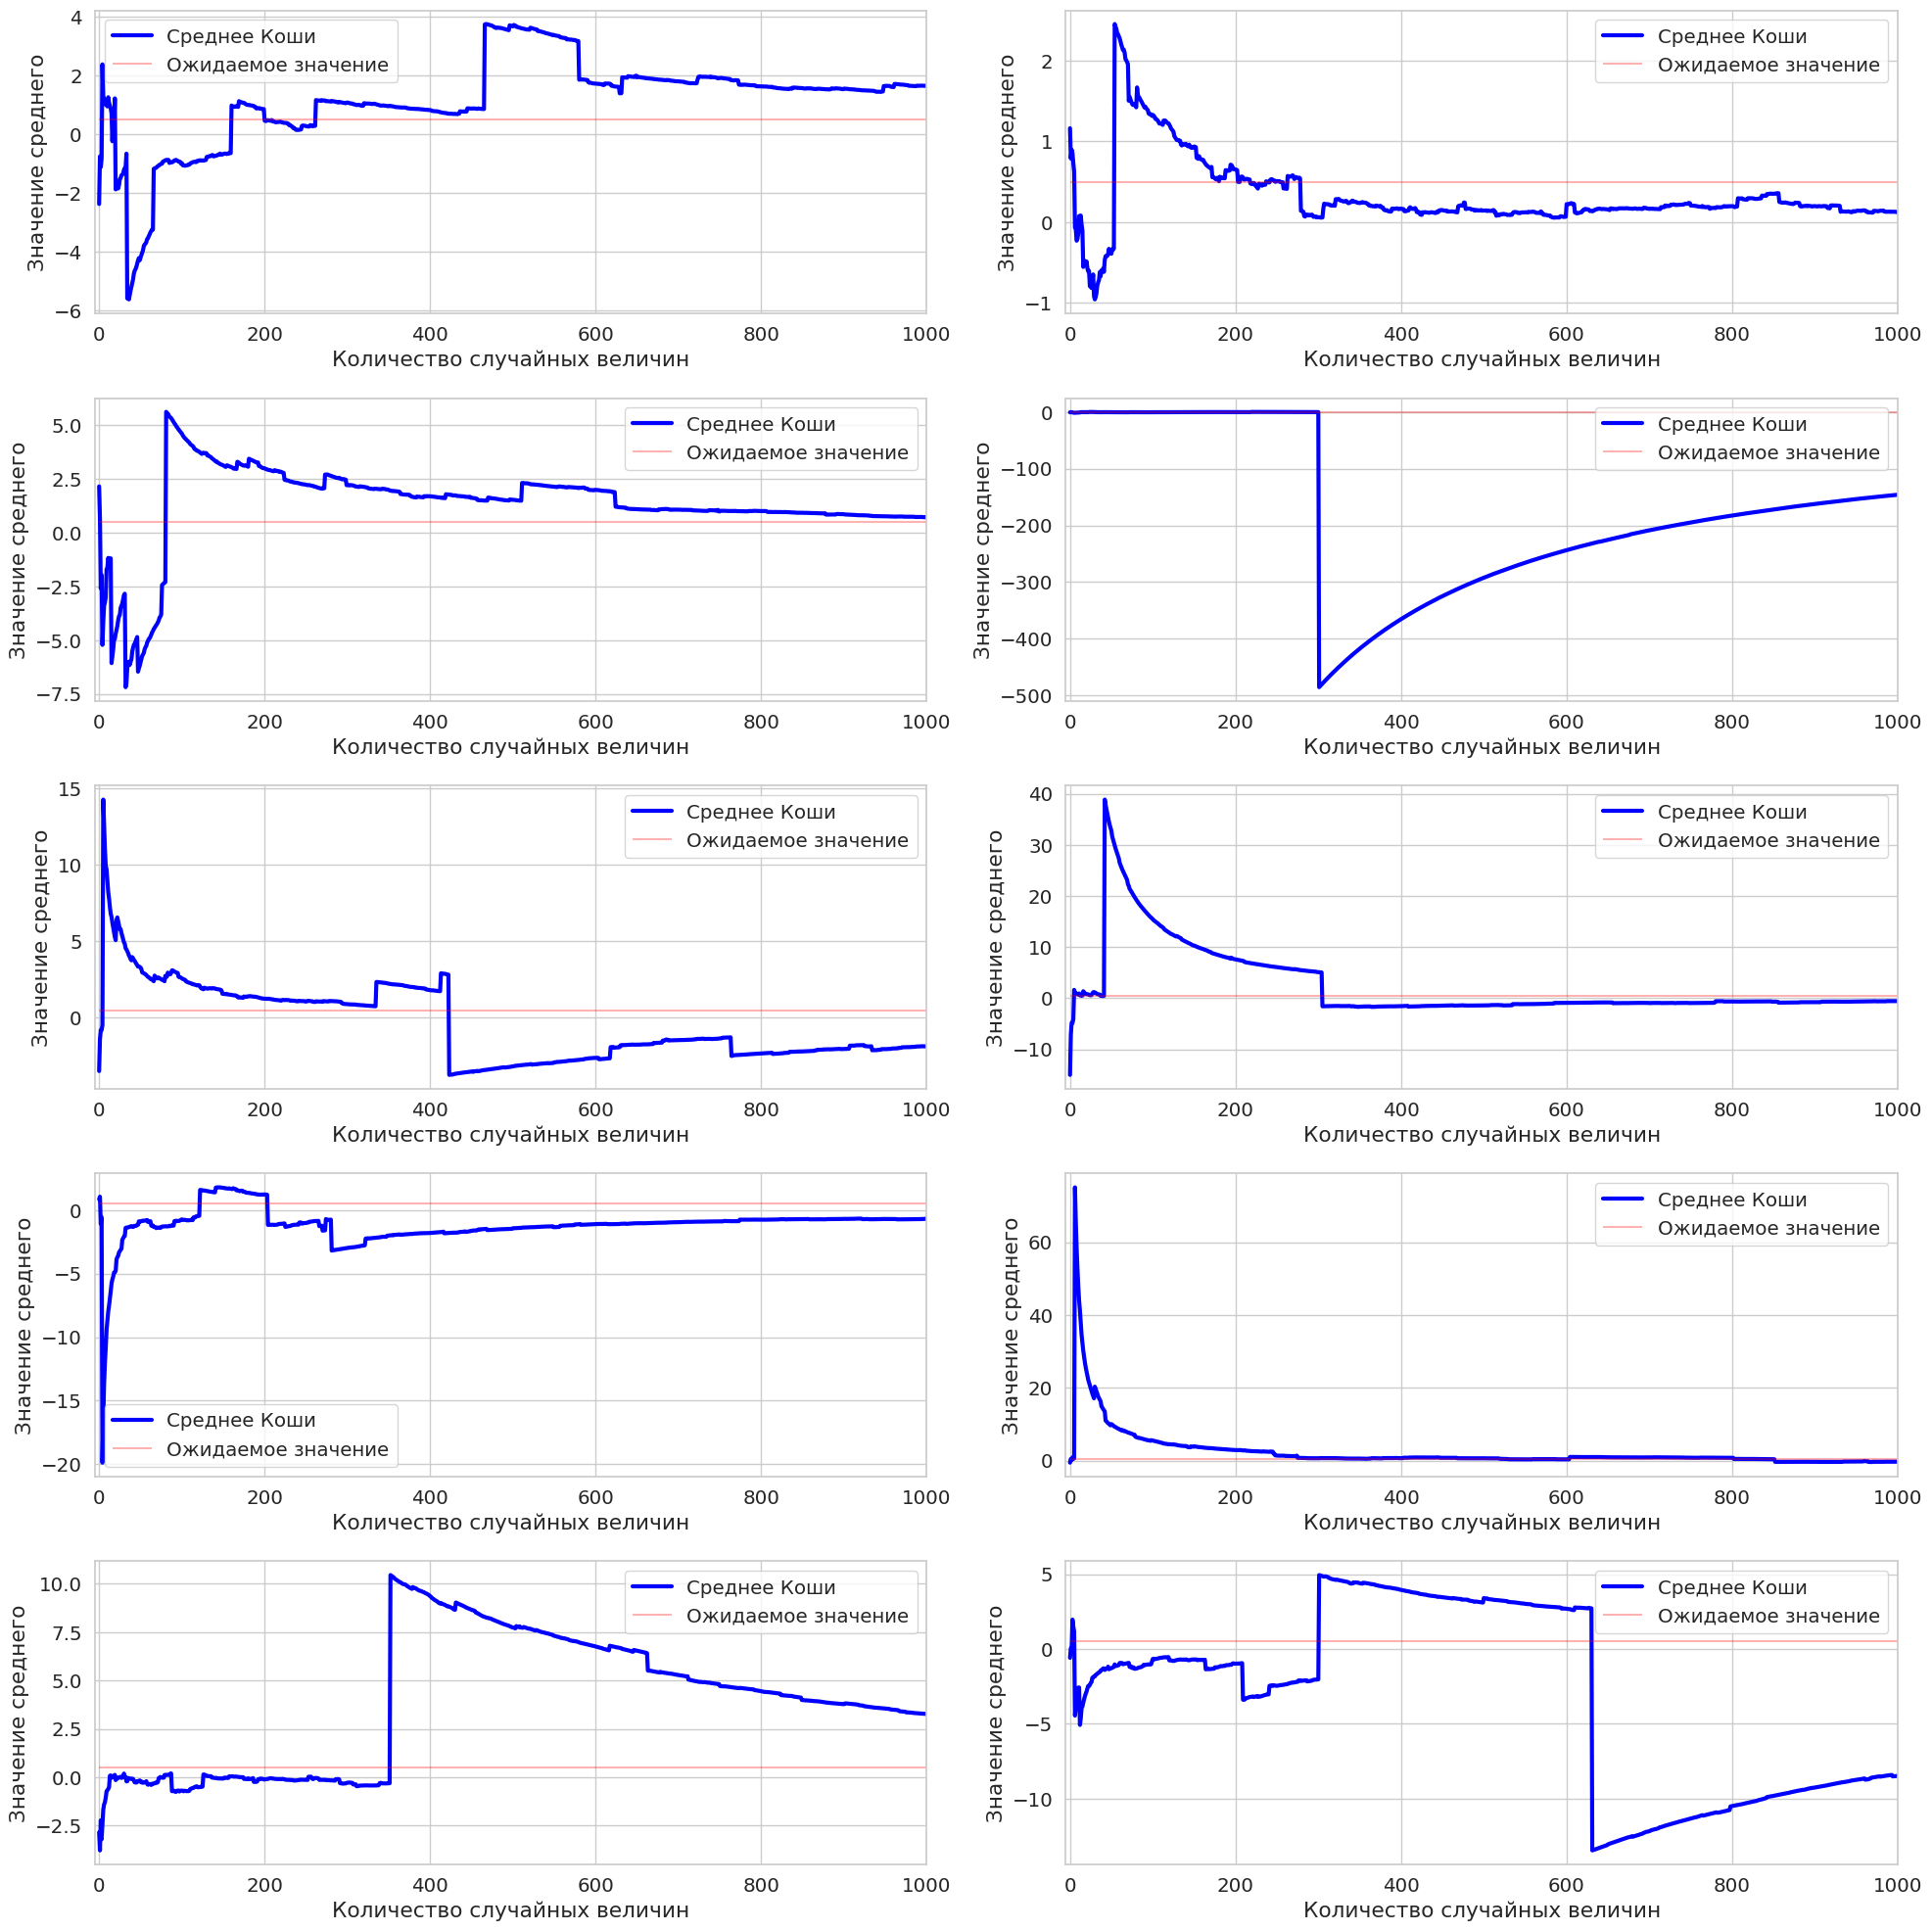

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

size = 1000
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)

    # График
    ax = plt.subplot(5, 2, i + 1)
    ax.plot(cum_means, lw=3, color='blue', label='Среднее Коши')
    plt.hlines(0.5, 0, size, color='red', alpha=0.3, label='Ожидаемое значение')
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.xlim((-5, size))
    plt.legend()

plt.tight_layout()
plt.show()


Построим графики, которые более точно покажут связь с математическим ожидание, будем менять разные параметры, а именно ```xlim``` ```ylim```, ```alpha```

In [13]:
size = 1000  # количество случайных величин
samples_count = 1000 # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

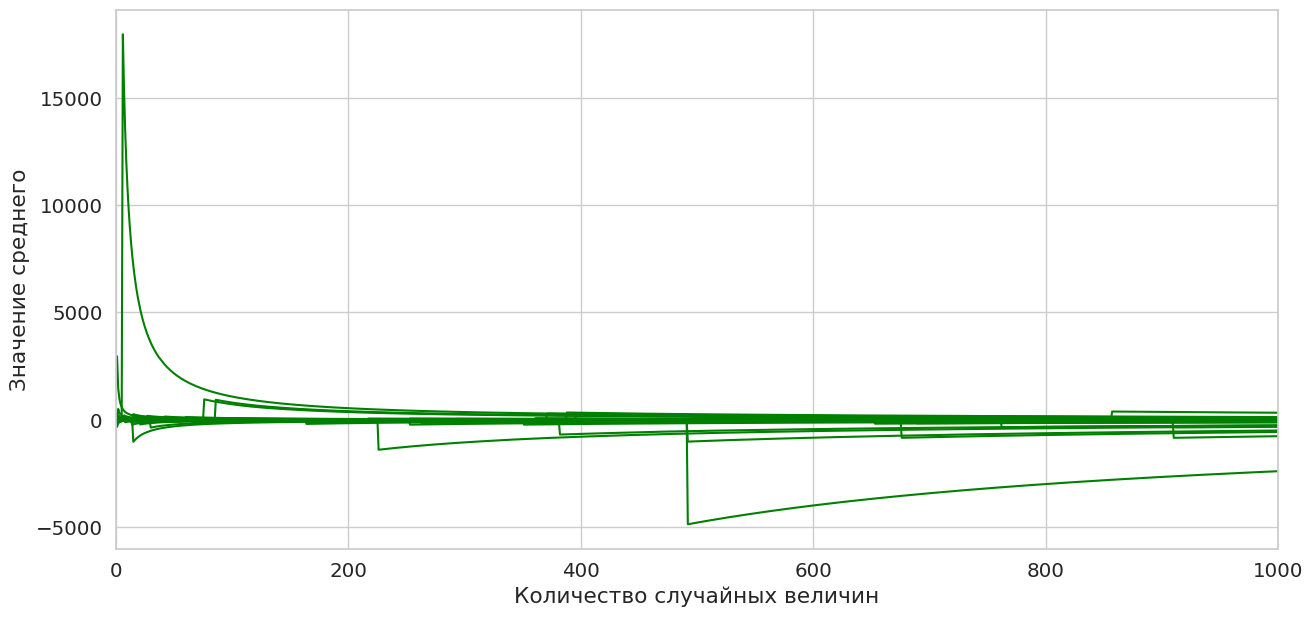

In [14]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green")

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size));


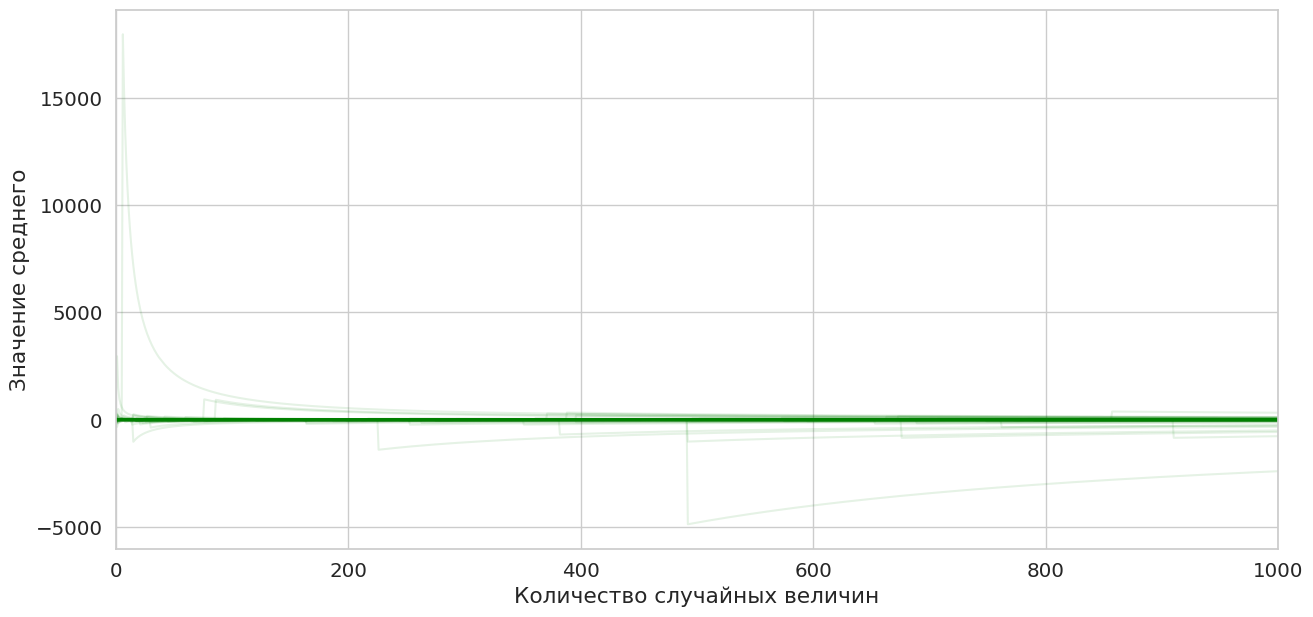

In [15]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.1)

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size));

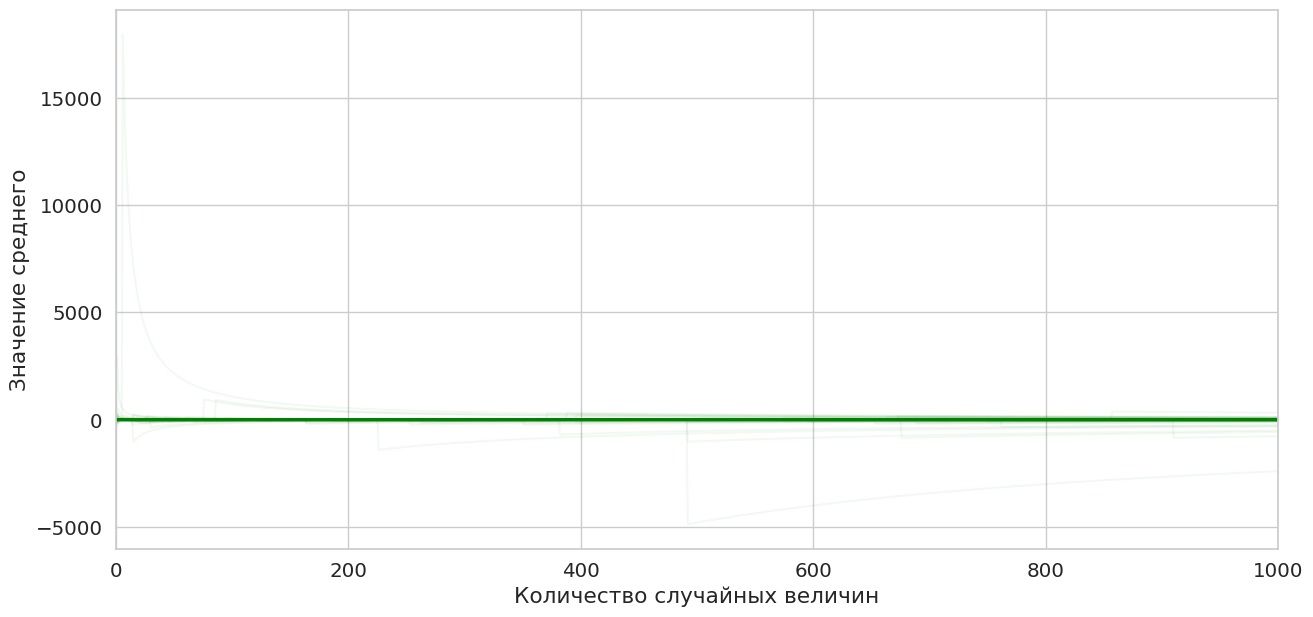

In [16]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.05)

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size));

(-5.0, 5.0)

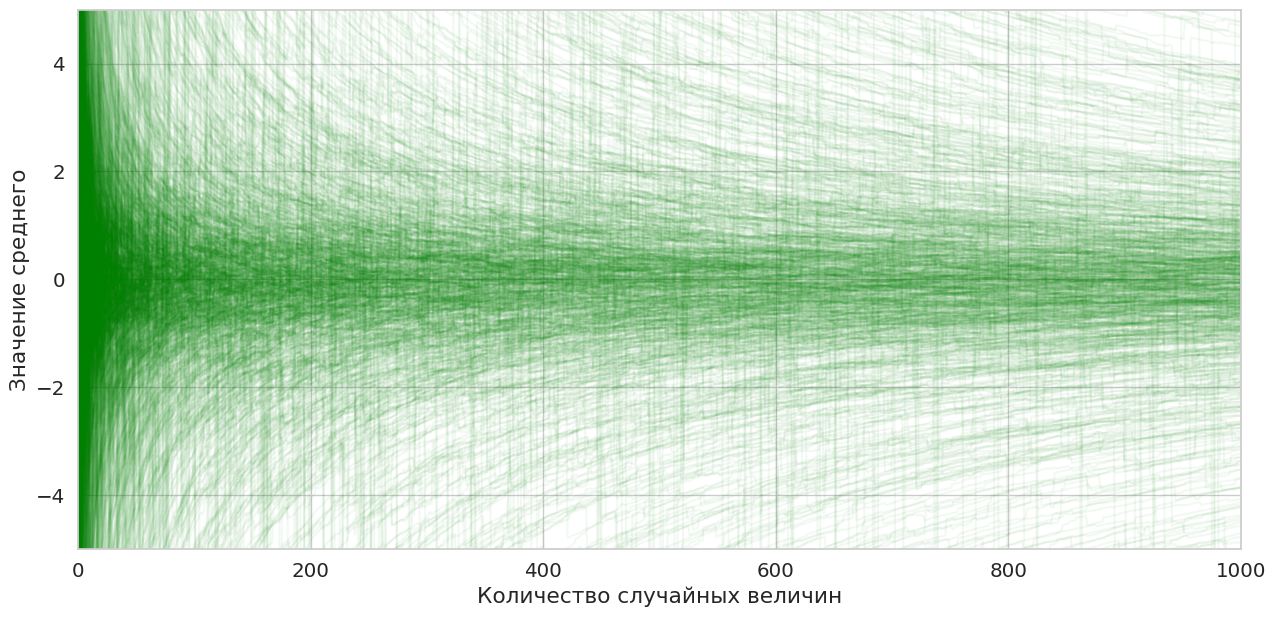

In [17]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.05)

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size));
plt.ylim((-5, 5))


(-5.0, 5.0)

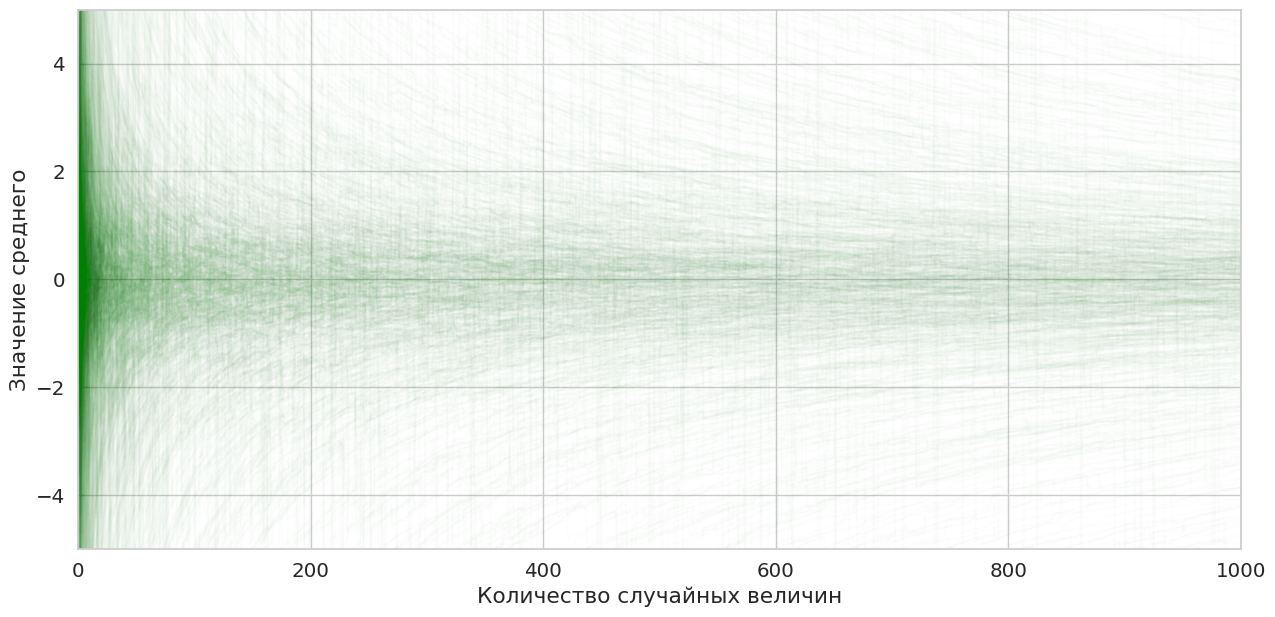

In [18]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.01)

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size));
plt.ylim((-5, 5))


***Вывод:***
- Как видно из графика, ЗБЧ не работает для распределени Коши.  Среднее значение выборки из распределения Коши не сходится к математическому ожиданию с увеличением размера выборки. Причина, как было описано в предыдущем пункте, кроется в тяжёлых хвостах. Тем самым, из-за них, вероятность выборочного значения значительно удалиться от истинного среднего намного выше, чем для многих других распределений. Это приводит к тому, что даже при увеличении размера выборки выборочные средние не сходятся к истинному/ожидаемому среднему.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

In [35]:
size = 1000  # количество случайных величин
samples = sps.cauchy.rvs(size=size)

cum_median = []
current_sample = []

for i in range(size):
    current_sample.append(samples[i])
    cum_median.append(np.median(current_sample))

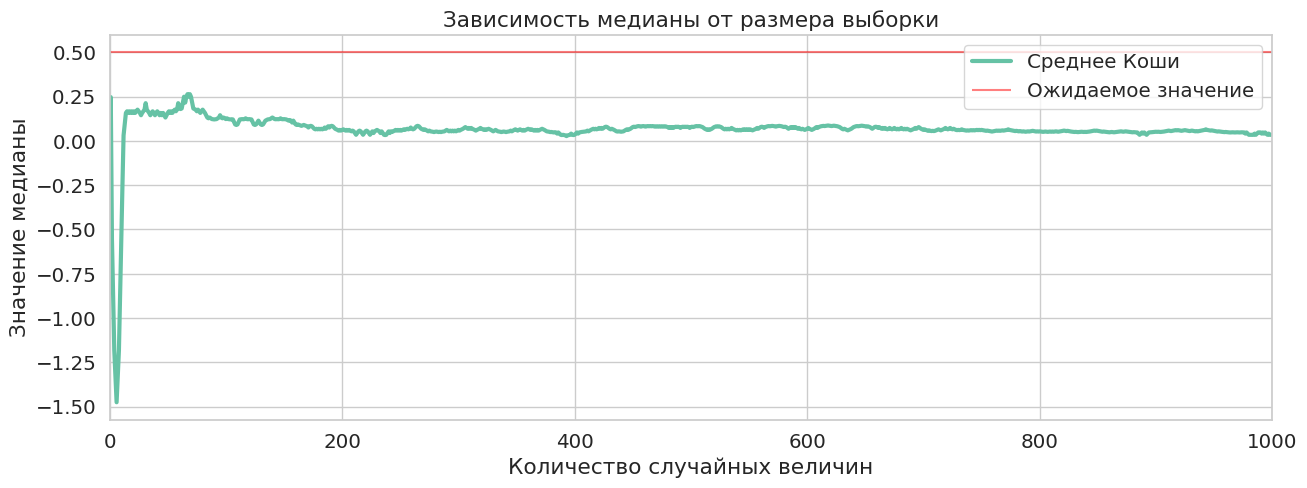

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(cum_median, lw=3, label='Cреднее Коши')
plt.hlines(0.5, 0, size, color='red', alpha=0.5, label='Ожидаемое значение')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.legend()
plt.title("Зависимость медианы от размера выборки")
plt.xlim((0, size));

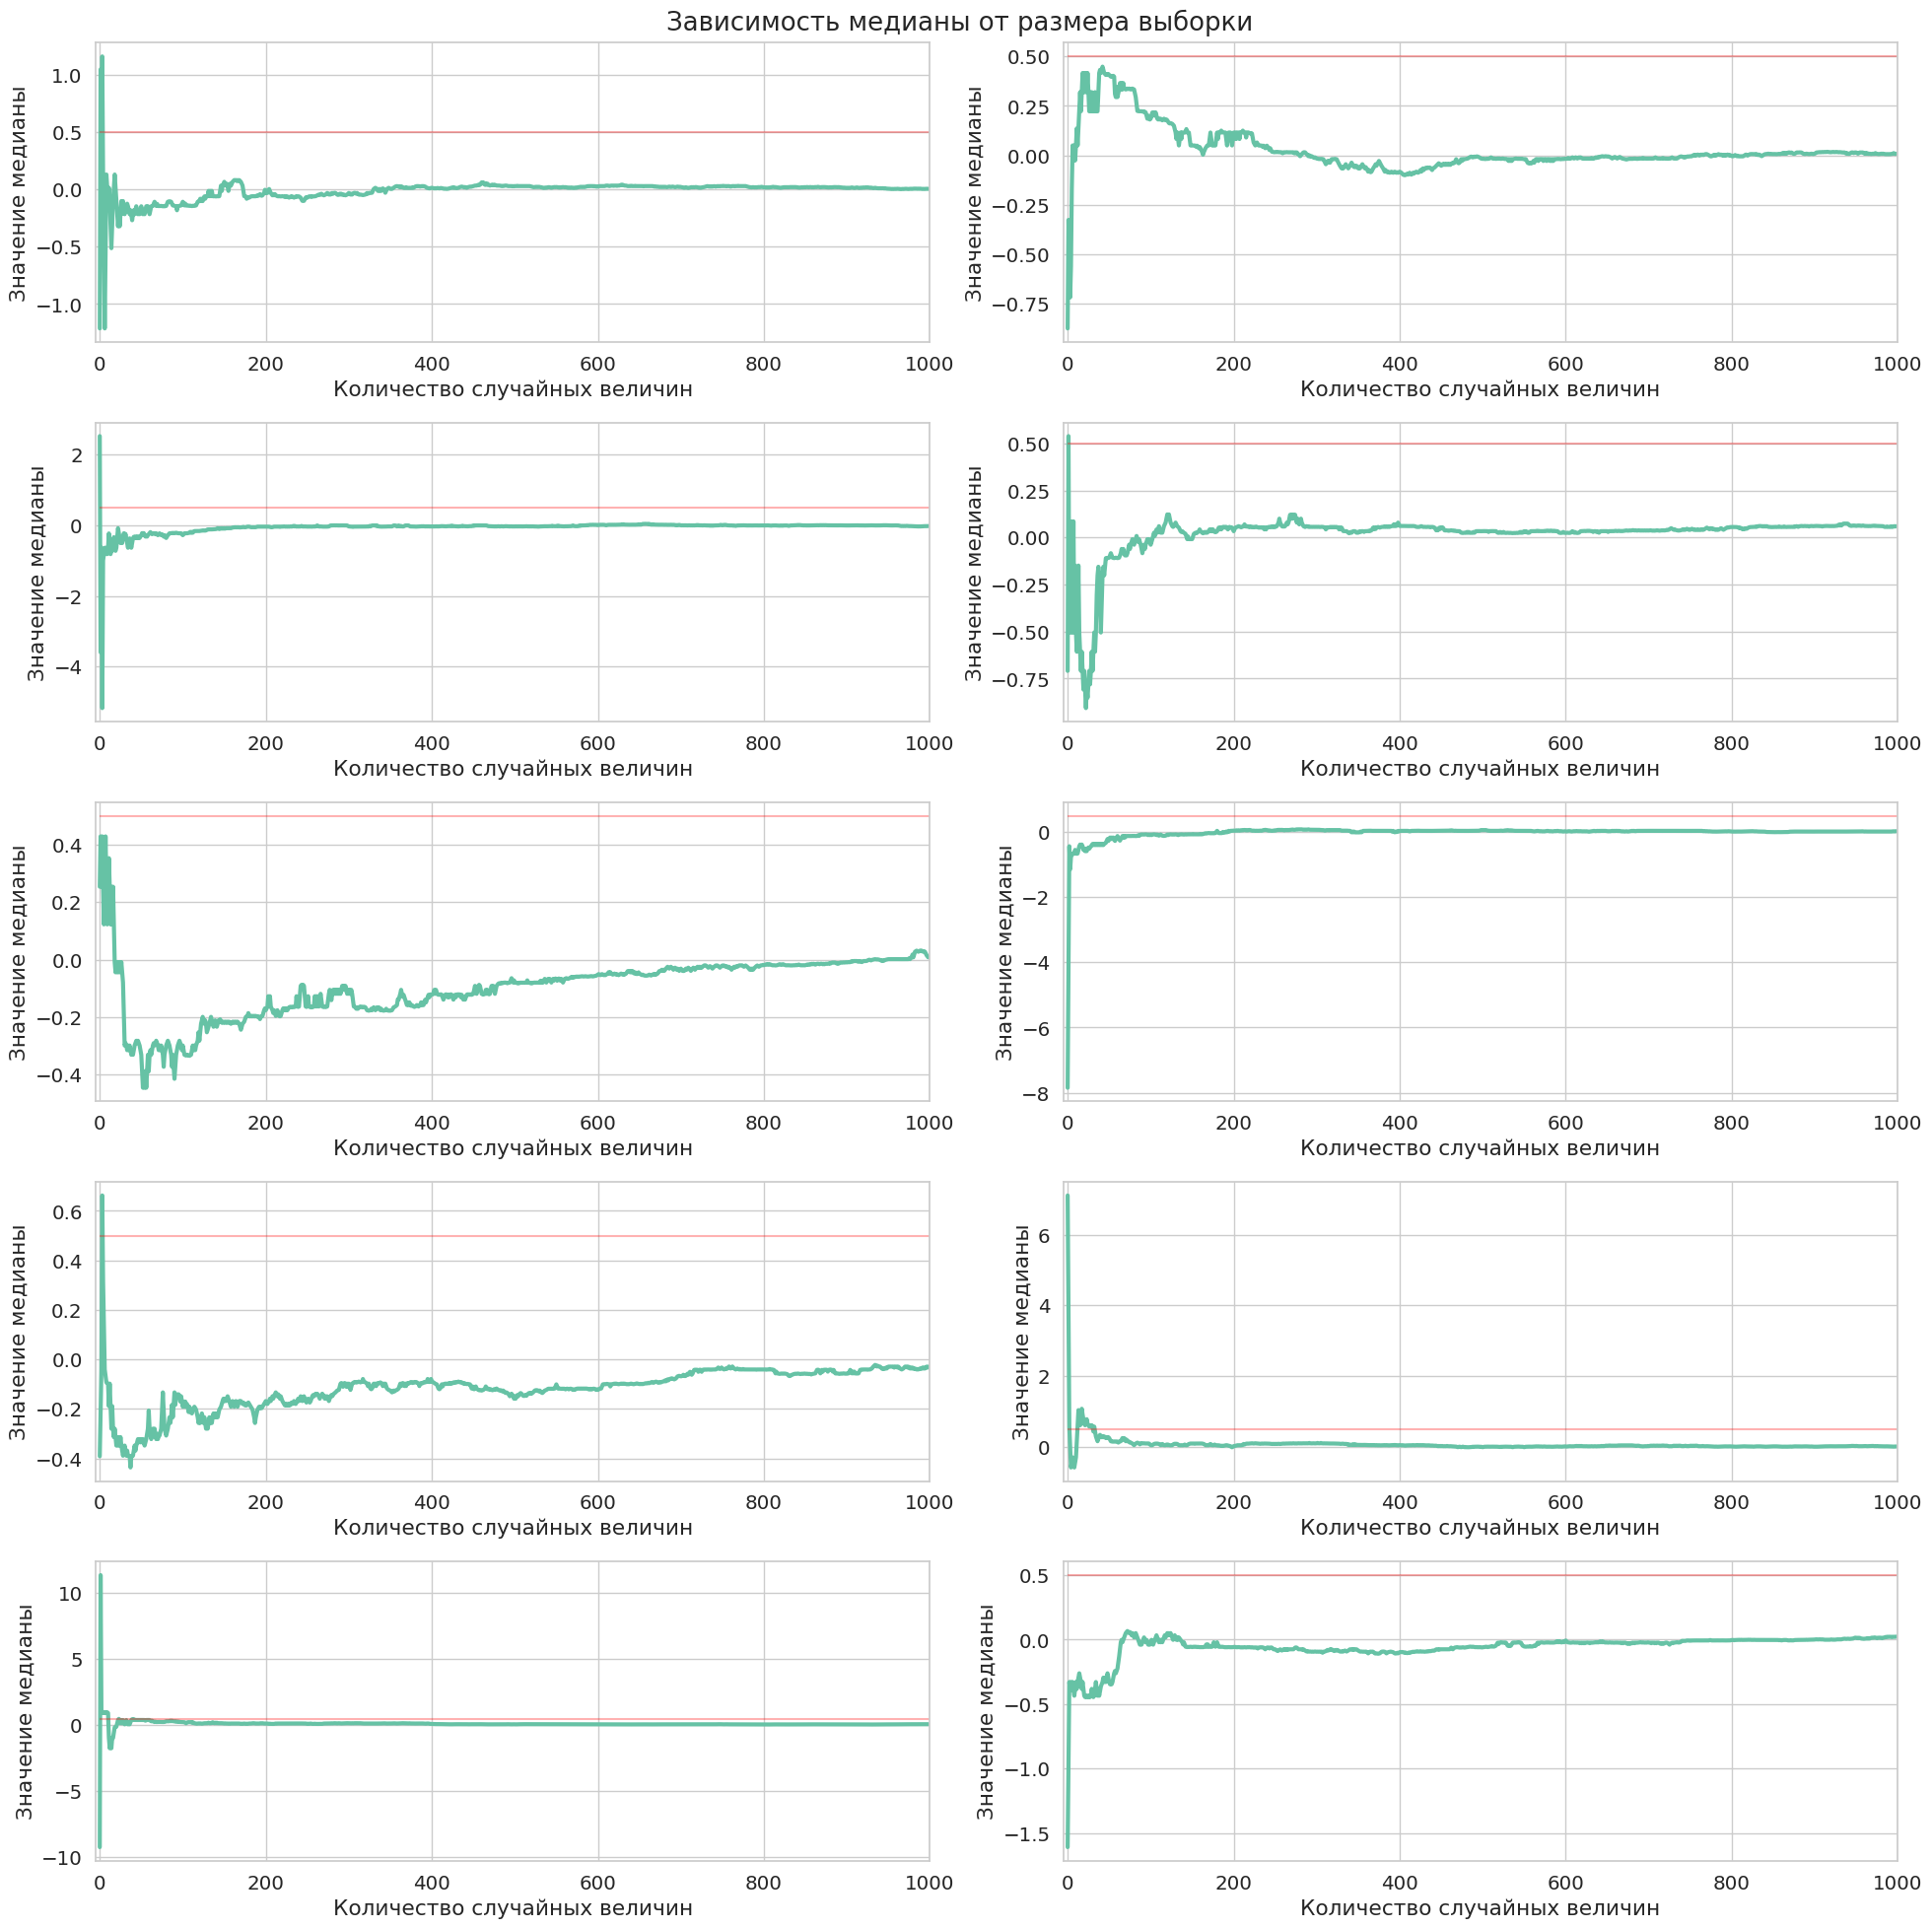

In [21]:
plt.figure(figsize=(20, 20))

for i in range(10):
    samples = sps.cauchy.rvs(size=size)
    cum_median = []
    for j in range(len(samples) - 1):
        subset = samples[:j + 1]
        median = np.median(subset)
        cum_median.append(median)

    plt.subplot(5, 2, i+1)
    plt.plot(cum_median, lw=3)
    plt.hlines(0.5, 0, size, color='red', alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение медианы')
    plt.xlim((-5, size))
    plt.suptitle("Зависимость медианы от размера выборки")

plt.tight_layout()


Построим графики, которые более точно покажут связь с математическим ожидание, будем менять разные параметры, а именно ```xlim``` ```ylim```, ```alpha```

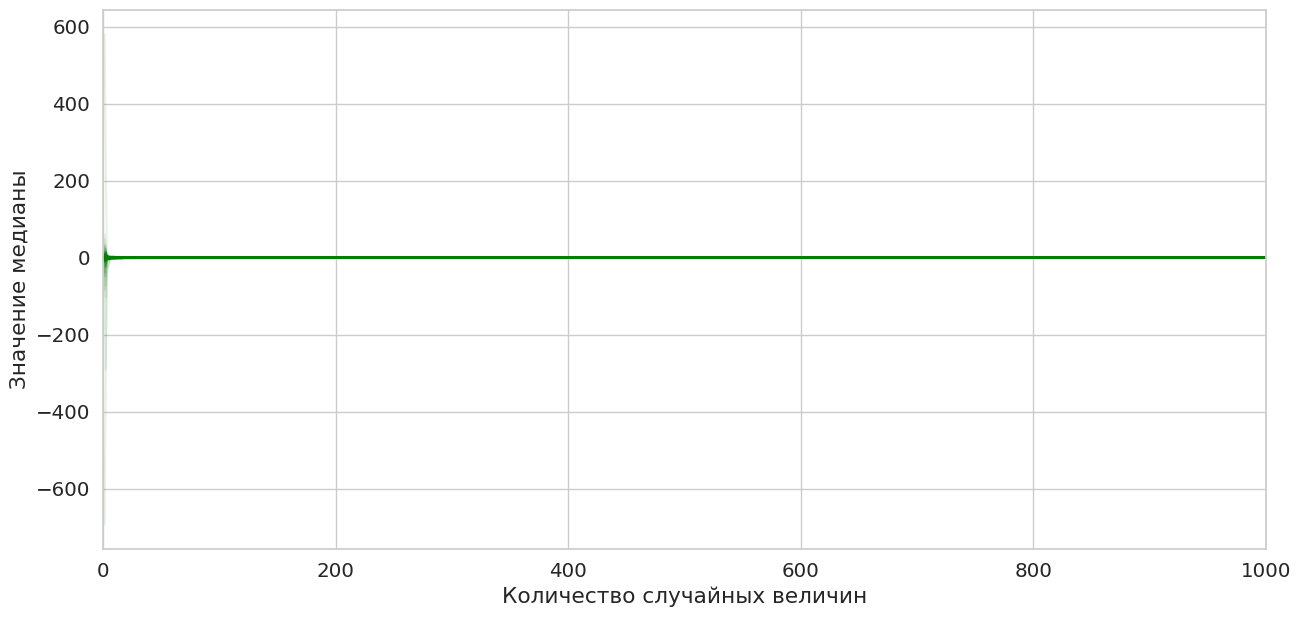

In [39]:
samples_count = 500
samples = sps.cauchy.rvs(size=(samples_count, size))

cum_median = []

for i in range(samples_count):
    medians = []
    for j in range(size):
        subset = samples[i][:j + 1]
        median = np.median(subset)
        medians.append(median)
    cum_median.append(medians)

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_median[i], color='green', alpha=0.1)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.show()


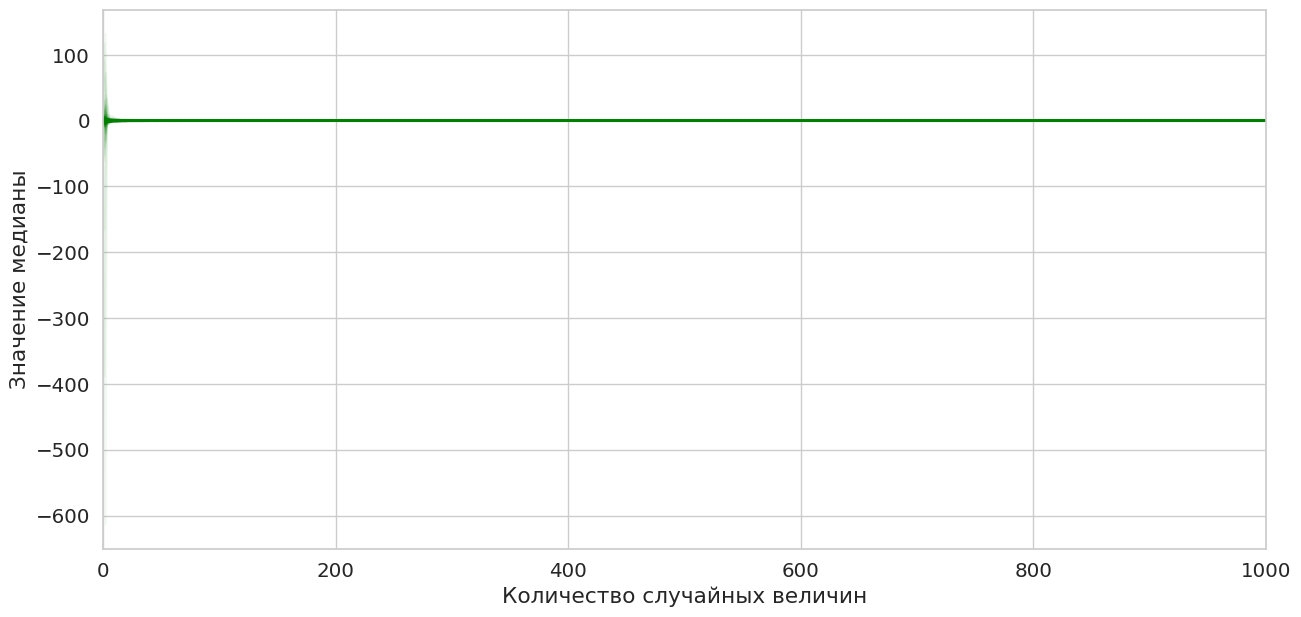

In [32]:
samples_count = 500
samples = sps.cauchy.rvs(size=(samples_count, size))

cum_median = []

for i in range(samples_count):
    medians = []
    for j in range(size):
        subset = samples[i][:j + 1]
        median = np.median(subset)
        medians.append(median)
    cum_median.append(medians)

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_median[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.show()


In [24]:
samples_count = 500
samples = sps.cauchy.rvs(size=(samples_count, size))

cum_median = []

for i in range(samples_count):
    medians = []
    for j in range(size):
        subset = samples[i][:j + 1]
        median = np.median(subset)
        medians.append(median)
    cum_median.append(medians)

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_median[i], color='green', alpha=0.1)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.ylim((-5, 5))
plt.show()


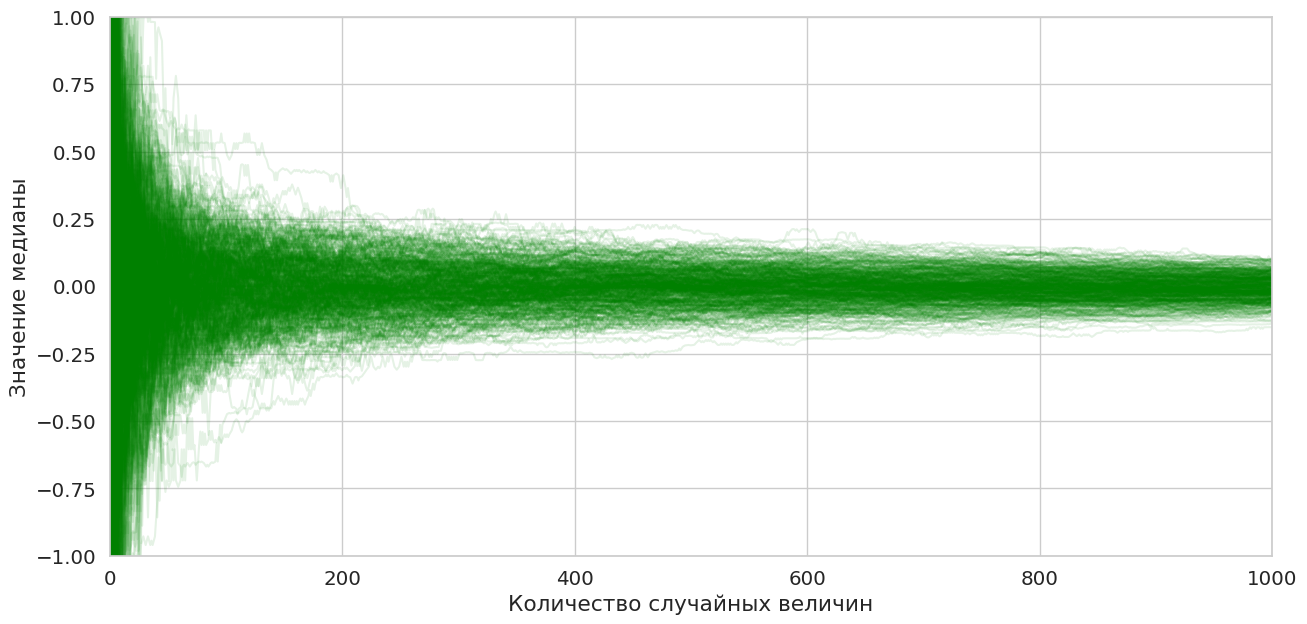

In [25]:
samples_count = 500
samples = sps.cauchy.rvs(size=(samples_count, size))

cum_median = []

for i in range(samples_count):
    medians = []
    for j in range(size):
        subset = samples[i][:j + 1]
        median = np.median(subset)
        medians.append(median)
    cum_median.append(medians)

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_median[i], color='green', alpha=0.1)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.ylim((-1, 1))
plt.show()


In [26]:
samples_count = 500
samples = sps.cauchy.rvs(size=(samples_count, size))

cum_median = []

for i in range(samples_count):
    medians = []
    for j in range(size):
        subset = samples[i][:j + 1]
        median = np.median(subset)
        medians.append(median)
    cum_median.append(medians)

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_median[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.ylim((-1, 1))
plt.show()


**Вывод:**

Как видно из построенных графиков, выборочная медиана действует по ЗБЧ, а значит к стремиться к математическому ожиданию. Следовательно, у выборочной медианы есть мат.ожидание в отличии распределение Коши и нет тяжёлых хвостов и выбросов из-за них на краях. При достаточно большой выборке данных, оно явно стремиться к константе.Особенно это видно на последнем графике.Таким образом, выборочная медиана является надежной оценкой центральной тенденции в случае наличия выбросов

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Необходимый размер выборки: 415


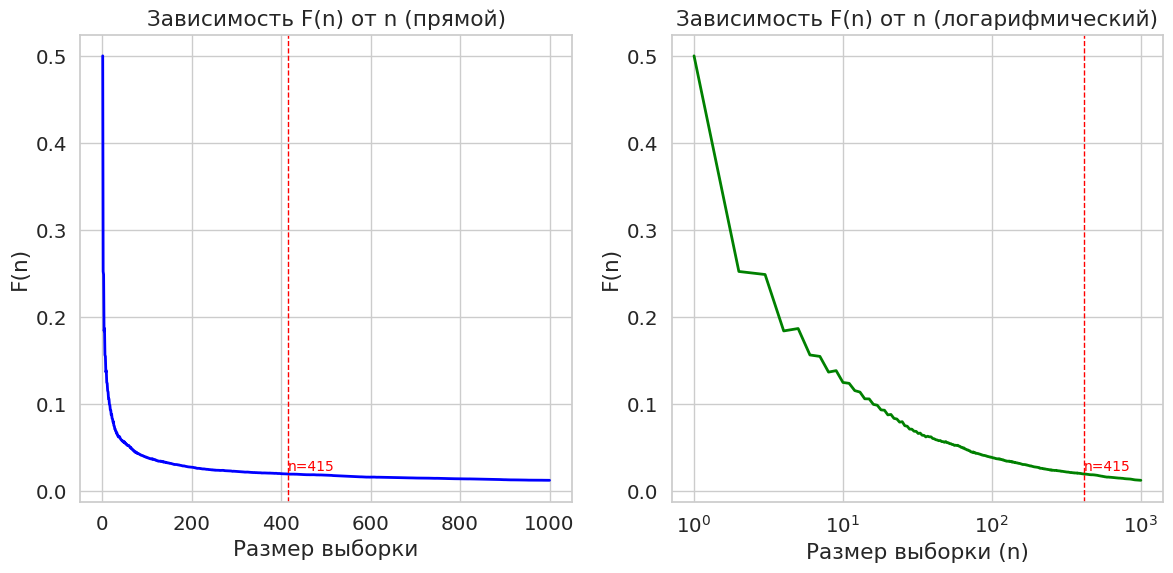

In [40]:

# Заданные значения
a = 0.5
epsilon = 0.02
K = 500
samples_count = 1000  # Количество выборок
size = 1000  # Размер каждой выборки

# Генерируем выборку и вычисляем кумулятивные средние
samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

# Функция для вычисления F(n)
def calculate_F(n, cum_means, a):
    return np.mean(np.abs(cum_means[:, n - 1] - a))

# Вычисляем F(n) для всех значений n
n_ = np.arange(1, size + 1)
F_ = np.array([calculate_F(n_val, cum_means, a) for n_val in n_])

# Используем np.where для поиска необходимого размера выборки
n = np.where(F_ <= epsilon)[0][0] + 1
print("Необходимый размер выборки:", n)

# Визуализация
plt.figure(figsize=(12, 6))

# Обычный масштаб
plt.subplot(1, 2, 1)
plt.plot(n_, F_, color='blue', linewidth=2)
plt.axvline(x=n, color='red', linestyle='--', linewidth=1)
plt.text(n, epsilon, f'n={n}', fontsize=10, ha='left', va='bottom', color='red')
plt.xlabel('Размер выборки')
plt.ylabel('F(n)')
plt.title('Зависимость F(n) от n (прямой)')
plt.grid(True)

# Логарифмический масштаб по оси x
plt.subplot(1, 2, 2)
plt.plot(n_, F_, color='green', linewidth=2)
plt.axvline(x=n, color='red', linestyle='--', linewidth=1)
plt.text(n, epsilon, f'n={n}', fontsize=10, ha='left', va='bottom', color='red')
plt.xlabel('Размер выборки (n)')
plt.ylabel('F(n)')
plt.title('Зависимость F(n) от n (логарифмический)')
plt.xscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()


Необходимый размер выборки: 397


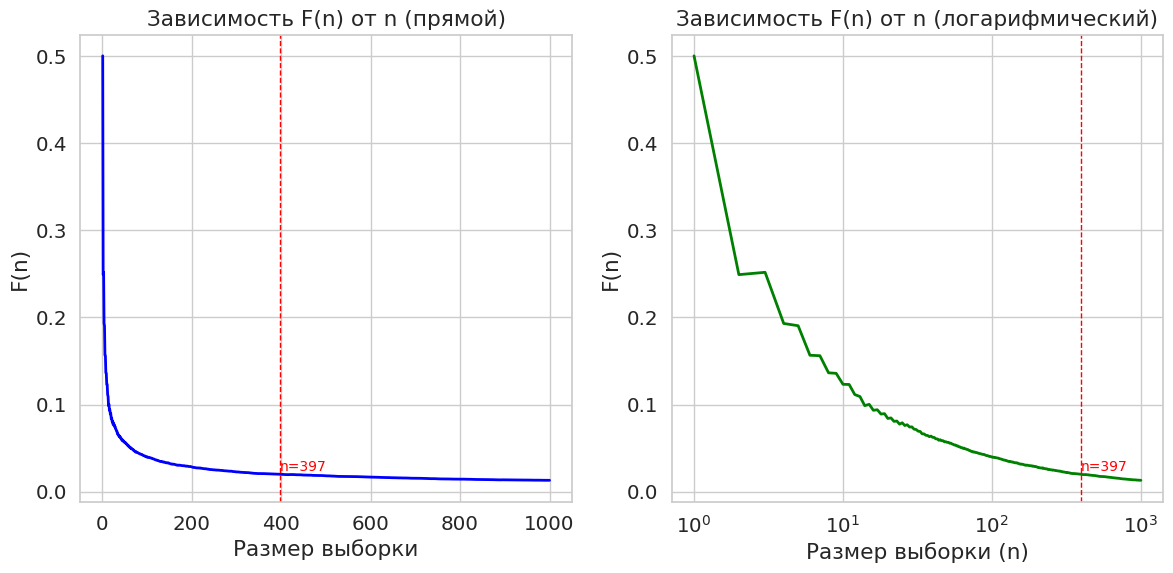

In [41]:

# Заданные значения
a = 0.5
epsilon = 0.02
K = 500
samples_count = 1000  # Количество выборок
size = 1000  # Размер каждой выборки

# Генерируем выборку и вычисляем кумулятивные средние
samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

# Функция для вычисления F(n)
def calculate_F(n, cum_means, a):
    return np.mean(np.abs(cum_means[:, n - 1] - a))

# Вычисляем F(n) для всех значений n
n_ = np.arange(1, size + 1)
F_ = np.array([calculate_F(n_val, cum_means, a) for n_val in n_])

# Используем np.where для поиска необходимого размера выборки
n = np.where(F_ <= epsilon)[0][0] + 1
print("Необходимый размер выборки:", n)

# Визуализация
plt.figure(figsize=(12, 6))

# Обычный масштаб
plt.subplot(1, 2, 1)
plt.plot(n_, F_, color='blue', linewidth=2)
plt.axvline(x=n, color='red', linestyle='--', linewidth=1)
plt.text(n, epsilon, f'n={n}', fontsize=10, ha='left', va='bottom', color='red')
plt.xlabel('Размер выборки')
plt.ylabel('F(n)')
plt.title('Зависимость F(n) от n (прямой)')
plt.grid(True)

# Логарифмический масштаб по оси x
plt.subplot(1, 2, 2)
plt.plot(n_, F_, color='green', linewidth=2)
plt.axvline(x=n, color='red', linestyle='--', linewidth=1)
plt.text(n, epsilon, f'n={n}', fontsize=10, ha='left', va='bottom', color='red')
plt.xlabel('Размер выборки (n)')
plt.ylabel('F(n)')
plt.title('Зависимость F(n) от n (логарифмический)')
plt.xscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()


In [42]:

# Заданные значения
a = 0.5
epsilon = 0.02
K = 500
samples_count = 1000  # Количество выборок
size = 1000  # Размер каждой выборки

# Генерируем выборку и вычисляем кумулятивные средние
samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

# Функция для вычисления F(n)
def calculate_F(n, cum_means, a):
    return np.mean(np.abs(cum_means[:, n - 1] - a))

# Вычисляем F(n) для всех значений n
n_ = np.arange(1, size + 1)
F_ = np.array([calculate_F(n_val, cum_means, a) for n_val in n_])

# Используем np.where для поиска необходимого размера выборки
n = np.where(F_ <= epsilon)[0][0] + 1
print("Необходимый размер выборки:", n)

# Визуализация
plt.figure(figsize=(12, 6))

# Обычный масштаб
plt.subplot(1, 2, 1)
plt.plot(n_, F_, color='blue', linewidth=2)
plt.axvline(x=n, color='red', linestyle='--', linewidth=1)
plt.text(n, epsilon, f'n={n}', fontsize=10, ha='left', va='bottom', color='red')
plt.xlabel('Размер выборки')
plt.ylabel('F(n)')
plt.title('Зависимость F(n) от n (прямой)')
plt.grid(True)

# Логарифмический масштаб по оси x
plt.subplot(1, 2, 2)
plt.plot(n_, F_, color='green', linewidth=2)
plt.axvline(x=n, color='red', linestyle='--', linewidth=1)
plt.text(n, epsilon, f'n={n}', fontsize=10, ha='left', va='bottom', color='red')
plt.xlabel('Размер выборки (n)')
plt.ylabel('F(n)')
plt.title('Зависимость F(n) от n (логарифмический)')
plt.xscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()


Необходимый размер выборки: 400


***Вывод:***
- Исходя из графиков, в первом приближении, можно видеть линейную зависимость при логарифмическом представлении, и степенную зависимость в обычном (прямом представлении).
- Исходя из нескольких эксперементов(количество=3), видно что в среднем необходимый размер выборки около 400. Получили значения от 397 до 415 на трёх графиках.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [52]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

# Заданные значения
epsilon = 0.02
K = 500
samples_count = 1000  # Количество выборок
size = 1000  # Размер каждой выборки
a_values = np.arange(0.05, 1, 0.05)  # Значения a

# Список для хранения необходимого размера выборки для каждого a
n_values = []

# Проходим по значениям a
for a in a_values:
    # Генерируем выборку и вычисляем кумулятивные средние
    samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

    # Функция для вычисления F(n)
    def calculate_F(n, cum_means, a):
        return np.mean(np.abs(cum_means[:, n - 1] - a))

    # Вычисляем F(n) для всех значений n
    n_values_a = np.arange(1, size + 1)
    F_values_a = np.array([calculate_F(n_val, cum_means, a) for n_val in n_values_a])

    # Используем np.where для поиска необходимого размера выборки
    n_a = np.where(F_values_a <= epsilon)[0][0] + 1
    n_values.append(n_a)

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(a_values, n_values, marker='o', color='blue', linewidth=2, markersize=8)
plt.xlabel('Значение a')
plt.ylabel('Необходимый размер выборки (n)')
plt.title('Зависимость n от a')
plt.grid(True)
plt.show()


In [50]:
epsilon = 0.02
samples_count = 1000  # Количество выборок
size = 1000  # Размер каждой выборки
a_values = np.arange(0.05, 1, 0.05)  # Значения a

# Список для хранения необходимого размера выборки для каждого a
n_values = []

# Проходим по значениям a
for a in a_values:
    # Генерируем выборку и вычисляем кумулятивные средние
    samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

    # Функция для вычисления F(n)
    def calculate_F(n, cum_means, a):
        return np.mean(np.abs(cum_means[:, n - 1] - a))

    # Вычисляем F(n) для всех значений n
    n_values_a = np.arange(1, size + 1)
    F_values_a = np.array([calculate_F(n_val, cum_means, a) for n_val in n_values_a])

    # Используем np.where для поиска необходимого размера выборки
    n_a = np.where(F_values_a <= epsilon)[0][0] + 1
    n_values.append(n_a)

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(a_values, n_values, marker='o', color='blue', linewidth=2, markersize=8, label='Необходимый размер выборки (n)')
plt.xlabel('Значение a')
plt.ylabel('Необходимый размер выборки (n)')
plt.title('Зависимость n от a')
plt.legend()
plt.grid(True)
plt.show()

**Выводы:**

По 1-му вопросу:
- Исходя из графиков, в первом приближении, можно видеть практически обратную зависемость и на простом и на логарифмическом графиках.
- Исходя из нескольких эксперементов(количество=3), видно что в среднем необходимый размер выборки около 400. Получили значения от 397 до 415 на трёх графиках.

По 2-му вопроу:
- По графику мы получили точную зависимость размера выборки от ```a```. Исходя из данных на графике, $F(n) \leqslant 0.02$ достигается примерно в окресности $a=0.5$ и примерно равен 400.
- Мы получили что-то похожее на нормальное распределение, так как при отклоенее от $0.5$ как вправо, так и влево, мы получаем уже числа меньше 400. Пик достигается в середине. Симметричное распределение приводит к симметричному графику $x = 0.5 +- погрешность$
- Так же последний график демонстриурет зависимость от математического ожидания.Данная зависимость может быть приближена параболой.